# Prueba de código de modulación.

Text(0.5, 0, 'Time')

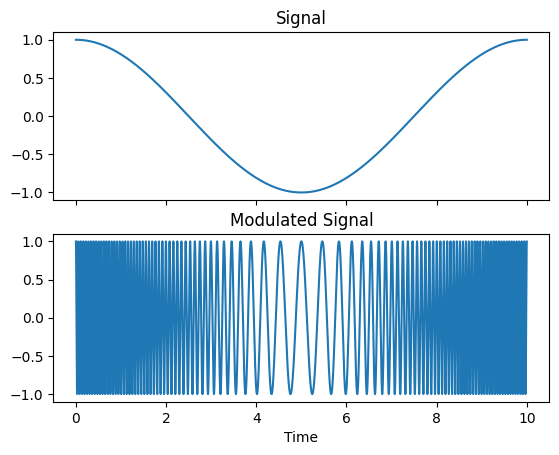

In [69]:
import numpy as np
import matplotlib.pyplot as plt

#%% signal generation
fn = 500 # Nyquist Frequency
fs = 2*fn # sampling frequency
t = np.arange(0, 10, 1/fs) # time axis

f_sig = 0.1 # base signal frequency
sig = np.cos(2*np.pi*f_sig*t) # base signal

#%% modulation
fc = 10 # carrier frequency
k = 0.05 # sensitivity
phi = 2*np.pi*fc*t + k*np.cumsum(sig) # phase

sig_mod = np.cos(phi) # modulated signal

#%% plotting
fig, ax = plt.subplots(2, 1, num=0, clear=True, sharex=True)

ax[0].set_title('Signal')
ax[0].plot(t, sig)

ax[1].set_title('Modulated Signal')
ax[1].plot(t, sig_mod)
ax[1].set_xlabel('Time')


In [70]:
#Cargamos embbedings
from gensim.models import Word2Vec
from gensim.models import FastText

emotion_list = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

poems_w2v = {}
poems_fst = {}

for e in emotion_list:
    w2v_lines = Word2Vec.load("embeddings_poems/w2v_model_"+e)
    fst_lines = FastText.load("embeddings_poems/fst_model_"+e)
    poems_w2v[e] = w2v_lines
    poems_fst[e] = fst_lines

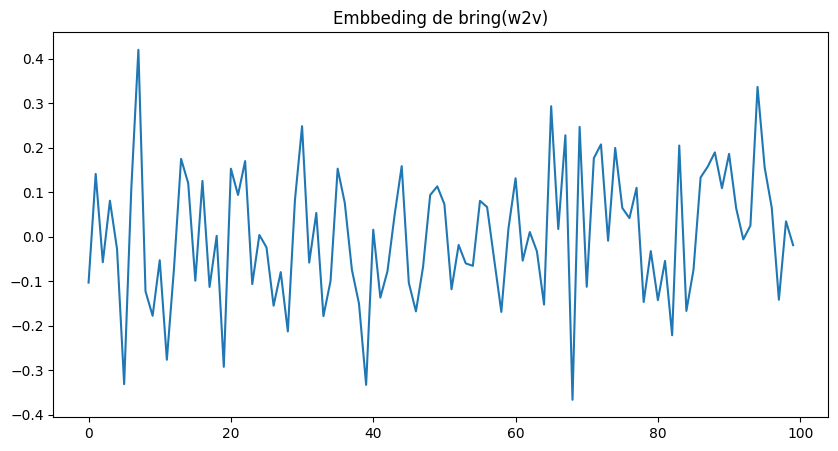

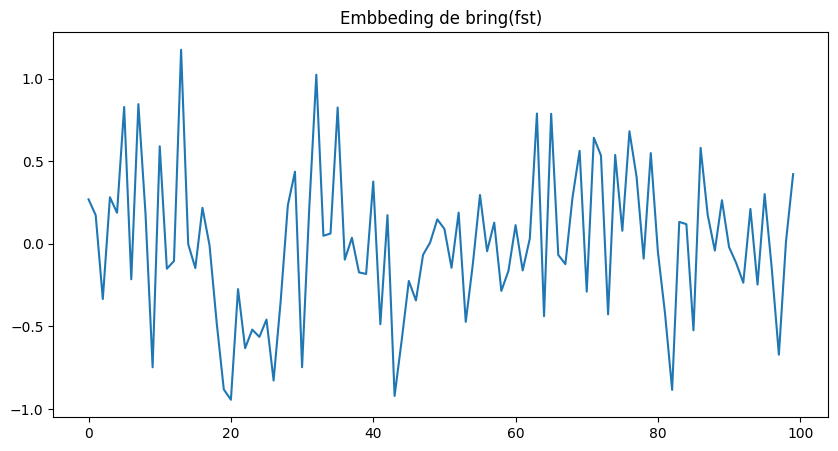

In [71]:
word = "bring"
emotion = "anger"
embbed_w2v = poems_w2v[emotion].wv.get_vector(word)
embbed_fst = poems_fst[emotion].wv.get_vector(word)

plt.figure(figsize=(10,5))
plt.title("Embbeding de "+word+"(w2v)")
plt.plot(embbed_w2v)

plt.figure(figsize=(10,5))
plt.title("Embbeding de "+word+"(fst)")
plt.plot(embbed_fst)

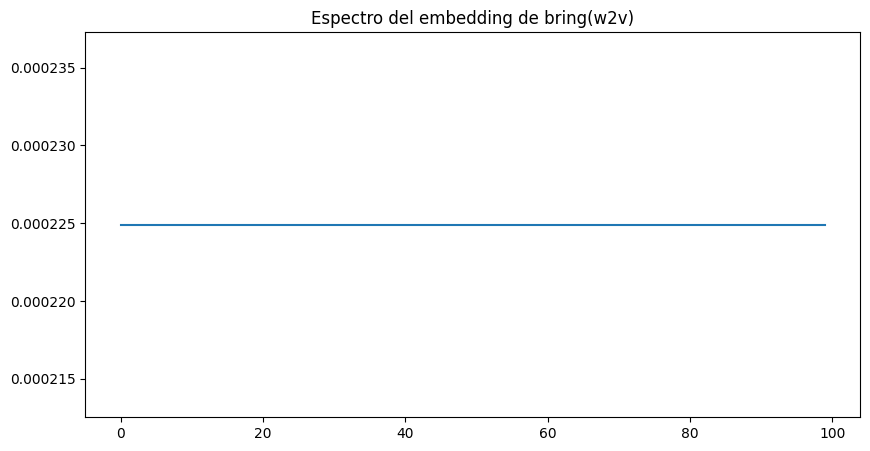

In [109]:
from memspectrum import MESA

M1 = MESA()
M1.solve(embbed_w2v)
N,dt = len(embbed_fst),1/len(embbed_w2v)
spec, frequencies = M1.spectrum(dt)
spec = np.fft.fftshift(spec)
frequencies = np.fft.fftshift(frequencies)


plt.figure(figsize=(10,5))
plt.title("Espectro del embedding de "+word+"(w2v)")
plt.plot(frequencies)

Text(0.5, 0, 'Time')

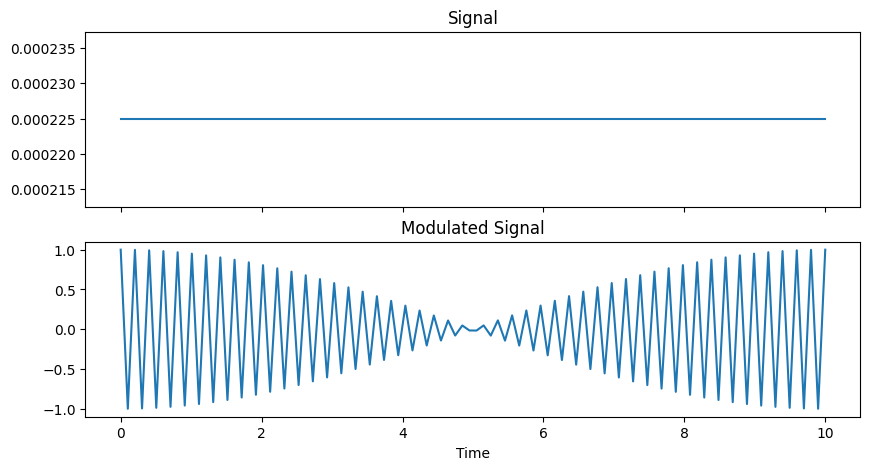

In [111]:
t = np.linspace(0,10,100) # time axis

fc = 5 # carrier frequency
k = 0.05 # sensitivity
phi = 2*np.pi*fc*t + k*np.cumsum(frequencies)

sig_mod = np.cos(phi) # modulated signal

#%% plotting
fig, ax = plt.subplots(2, 1, num=0, clear=True, sharex=True,figsize=(10,5))

ax[0].set_title('Signal')
ax[0].plot(t, frequencies)

ax[1].set_title('Modulated Signal')
ax[1].plot(t, sig_mod)
ax[1].set_xlabel('Time')